# Python Project
## By Taran Elgin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [ ]:
# Data Import
df = pd.read_csv('palmer_penguins.csv')

In [ ]:
# Dataframe Split
df_test= df.sample(frac = 0.3)
df_train = df.drop(df_test.index)

# Data Preprocessing

We first split the dataframe into two for train and test and then preprocess the data in following ways,

1. Replace Penguin species by only the first names.
2. Remove All rows with N/A values
3. Remove some columns that could be redundant in data analysis. These redundant features are studyName, Individual ID, Sample Number, Comments, Date Egg. We find these features to redundant because a lot among these features are like proper nouns and does not reveal any specific correlation with the Penguins, Penguin types, or any other feature in the dataset. We remove the feature comments because majority values are N/A and at this stage it is difficult to define this feature as qualitative feature.
4. We define, label_encoder function to preprocess specific features at the time of modeling.

In [ ]:
def preprocess(df):
  df['Species'].replace('Adelie Penguin (Pygoscelis adeliae)', 'Adelie', inplace=True)
  df['Species'].replace('Chinstrap penguin (Pygoscelis antarctica)', 'Chinstrap', inplace=True)
  df['Species'].replace('Gentoo penguin (Pygoscelis papua)', 'Gentoo', inplace=True)
  columns = ["studyName","Individual ID", "Sample Number", "Comments", "Date Egg"]
  df.drop(columns=columns, inplace=True)
  df.dropna(inplace=True)

  return df

def label_encoder(df, col):
  """
  input:
      df -> dataframe
      col -> column name to be encoded
  output:
      df -> dataframe with encoded column
  """
  le = preprocessing.LabelEncoder()
  df[col] = le.fit_transform(df[col])
  return df

In [ ]:
df_test = preprocess(df_test)
df_train = preprocess(df_train)
df = preprocess(df)

# Exploratory Data Analysis
We perform exploratory data analysis overall dataset (non splitted dataset). We perform following thing in EDA.

1. Summarizing the overall dataframe features with counts, mean, minimum, maximum values, etc.
2. Comparing Delta 15 N (o/oo) vs. Delta 13 C (o/oo) wrt Penguin Type
3. Comparing Body Mass and Flipper Length with Respect to Penguin Type and Sex
4. Comparing Culment Depth, Culmen length, Island, and Sex

In [ ]:
print("\tTable 1\t")
df.describe().round(2).style.background_gradient(cmap='PuBu')

	Table 1	


,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,44.050000,17.120000,201.260000,4216.000000,8.740000,-25.690000
std,5.470000,1.970000,13.960000,808.860000,0.550000,0.790000
min,32.100000,13.100000,172.000000,2700.000000,7.630000,-27.020000
25%,39.500000,15.600000,190.000000,3550.000000,8.300000,-26.330000
50%,44.900000,17.300000,197.000000,4050.000000,8.660000,-25.850000
75%,48.700000,18.600000,213.000000,4800.000000,9.180000,-25.060000
max,59.600000,21.500000,231.000000,6300.000000,10.030000,-23.890000


In [ ]:
def penguin_summary_table(group_cols, value_cols):
    summary = df.groupby(group_cols)[value_cols].mean().round(2)
    return summary


body_mass_result = penguin_summary_table(["Species", "Sex"], ["Body Mass (g)"])
print("\tTable 2\t\n")
print(body_mass_result)
flipper_length_result = penguin_summary_table(["Species", "Sex"], ["Flipper Length (mm)"])
print(flipper_length_result)

	Table 2	

                  Body Mass (g)
Species   Sex                  
Adelie    FEMALE        3366.55
          MALE          4053.68
Chinstrap FEMALE        3527.21
          MALE          3938.64
Gentoo    .             4875.00
          FEMALE        4679.74
          MALE          5488.75
                  Flipper Length (mm)
Species   Sex                        
Adelie    FEMALE               187.92
          MALE                 192.84
Chinstrap FEMALE               191.74
          MALE                 199.73
Gentoo    .                    217.00
          FEMALE               212.71
          MALE                 221.53


# Comparing Delta 15 N (o/oo) vs. Delta 13 C (o/oo) wrt Penguin Type

*Delta 15 N (o/oo)* and *Delta 13 C (o/oo)* denotes the measure of stable isotopes of Nitrogren in the penguins. The purpose of exploring the plot below is to find out how the values *Delta 15 N* and *Delta 13 C* differ in different types of species.

Considering the generated plot below, we can clearly say that the Chintrap Penguins have higher values of both of these isotopes as compared to other two penguin types. Also, Gentoo Penguins have lower values of both of these isotopes as compared to other two types of penguins. Adelie is somewhere in the middle.

The plot clearly indicates that there is correlation between these isotope values and the Penguin types. This is because we could see some regions with dense points of specific penguin types forming clusters.

There are a few outliers and the data points for Adelie penguin type are a bit scatter. Using these two numerical features along with one other categorical feature like *Sex* or *Island* could help us accurately identify the penguin type.




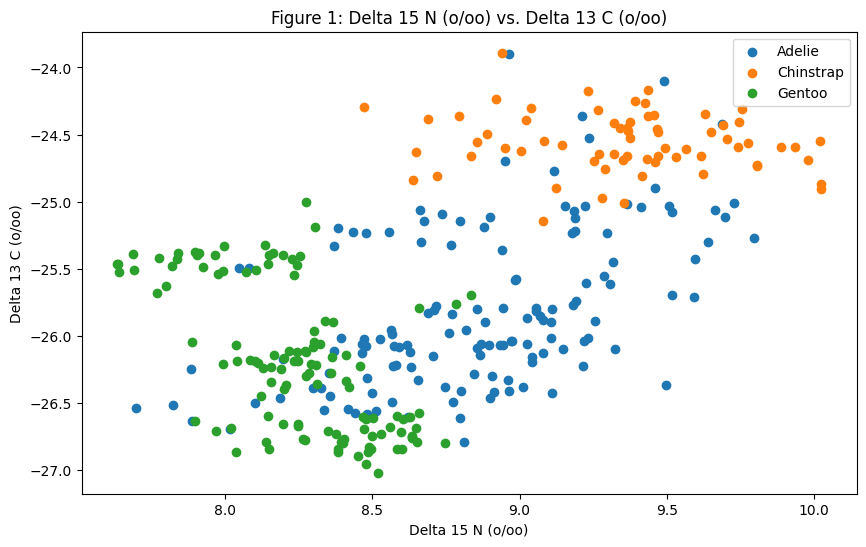

In [ ]:
plt.figure(figsize=(10, 6))

grouped = df.groupby('Species')

for name, group in grouped:
    plt.scatter(group['Delta 15 N (o/oo)'], group['Delta 13 C (o/oo)'], label=name)

plt.xlabel('Delta 15 N (o/oo)')
plt.ylabel('Delta 13 C (o/oo)')
plt.title('Figure 1: Delta 15 N (o/oo) vs. Delta 13 C (o/oo)')
plt.legend()
plt.show()

To select the third categorical feature, we try to find the correlation of the two types of isotopes with Sex and Island. This helps to identify a suitable categorical feature to pair with the nitrogen isotopes for training the machine learning model.

We horizontally stack two plots to compare the correlation of Sex and Island with the two types of isotopes present in penguins. It seems that the presence of these isotopes is independent of the sex of the penguin, as the subplot figure 2(a) is completely mixed. However in the subplot figure 2(b), there seems to be a correlation between these isotopes and different islands, as subplot is mixed for only two types of Islands that are Biscoe and Torgersen. For island Dream there seems to be a dominant dense point region.

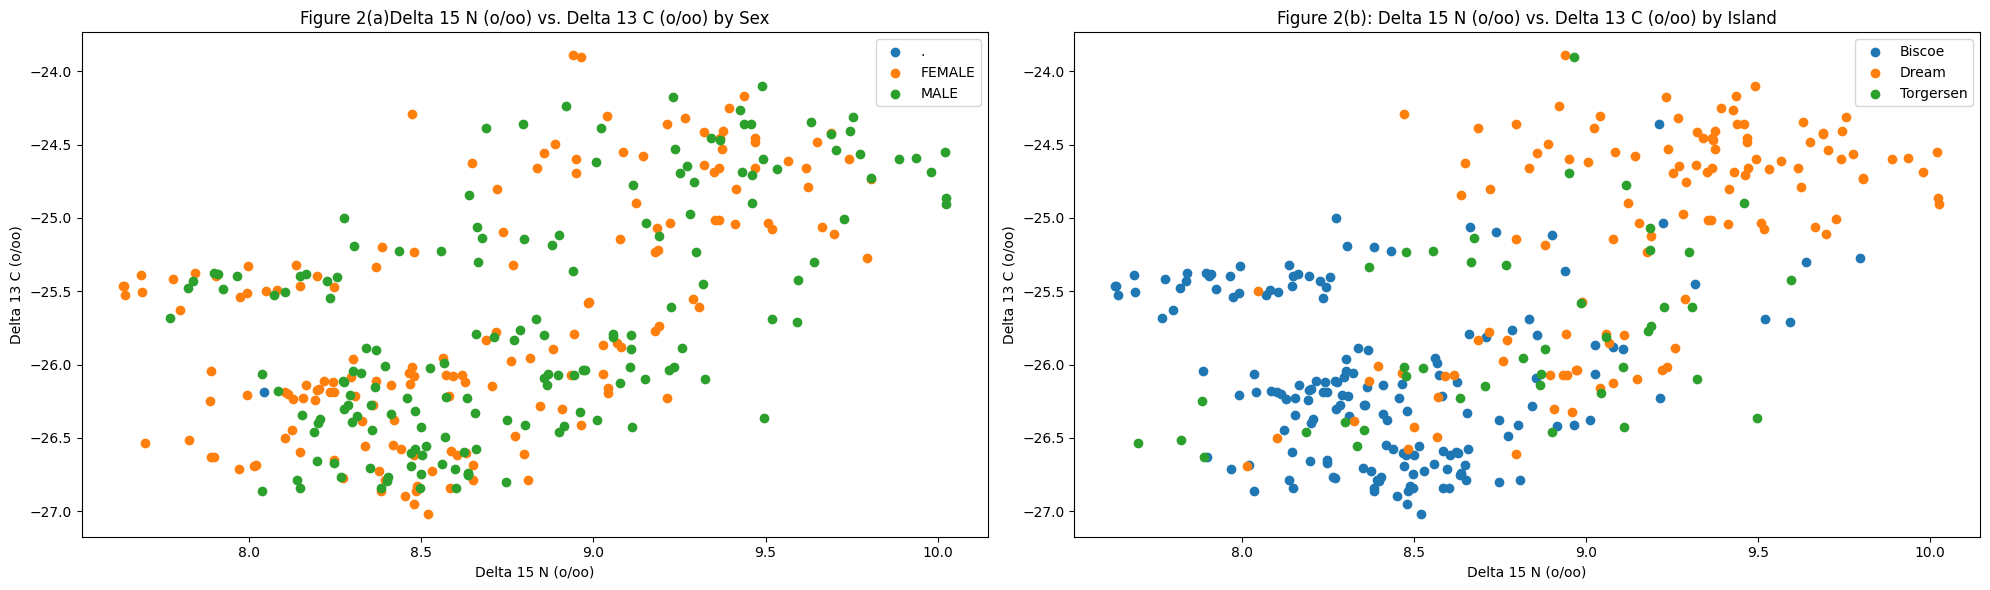

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))


# Subplot 1 figure 2(a): Scatter plot Delta 15 N (o/oo) and Delta 15 N (o/oo) grouped by gender
grouped_sex = df.groupby('Sex')
for name, group in grouped_sex:
    axes[0].scatter(group['Delta 15 N (o/oo)'], group['Delta 13 C (o/oo)'], label=name)

axes[0].set_xlabel('Delta 15 N (o/oo)')
axes[0].set_ylabel('Delta 13 C (o/oo)')
axes[0].set_title('Figure 2(a)Delta 15 N (o/oo) vs. Delta 13 C (o/oo) by Sex')
axes[0].legend()

# Subplot 2 figure 2(b): Scatter plot Delta 15 N (o/oo) and Delta 13 C (o/oo) grouped by Island
grouped_island = df.groupby('Island')
for name, group in grouped_island:
    axes[1].scatter(group['Delta 15 N (o/oo)'], group['Delta 13 C (o/oo)'], label=name)

axes[1].set_xlabel('Delta 15 N (o/oo)')
axes[1].set_ylabel('Delta 13 C (o/oo)')
axes[1].set_title('Figure 2(b): Delta 15 N (o/oo) vs. Delta 13 C (o/oo) by Island')
axes[1].legend()

plt.tight_layout()
plt.show()



# Comparing Body Mass and Flipper Length with Respect to Penguin Type and Sex

Considering the first subplot figure 3(a), which is a boxplot on the left-hand side, we observe that Gentoo penguins have a higher average body mass compared to Chinstrap and Adélie penguins. This suggests that body mass could be an important feature to consider when training a machine learning model.

In the second subplot figure 3(b), we see that male penguins have a higher average body mass compared to female penguins. This categorical feature highlights an important correlation between body mass and the sex of the penguin.

In the third subplot figure 3(c), we observe that male penguins have longer flipper lengths on average compared to female penguins.

By collectively considering all three subplots, we can infer that the higher body mass in male penguins and the longer flipper length in male penguins could correlate, suggesting a relationship between higher body mass and longer flipper length. This transitive relationship, along with the observed link between body mass and penguin type, indicates that these features can be collectively used to build a robust machine learning model.

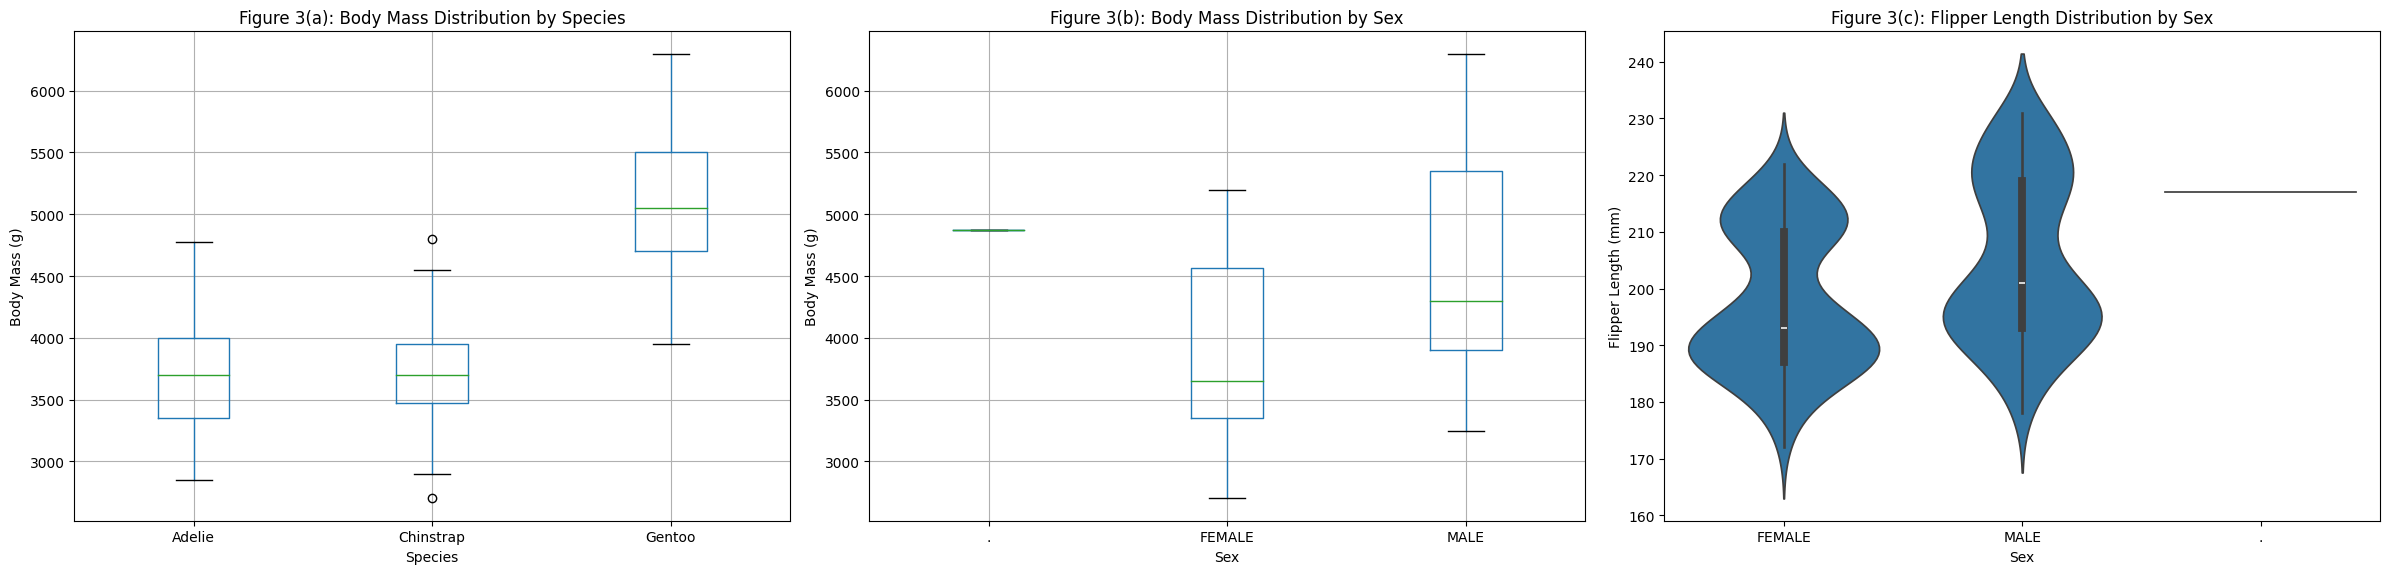

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Subplot 1: Boxplot of Body Mass by Species
df.boxplot(column='Body Mass (g)', by='Species', ax=axes[0])
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Body Mass (g)')
axes[0].set_title('Figure 3(a): Body Mass Distribution by Species')
axes[0].figure.suptitle('')

# Subplot 2: Boxplot of Body Mass by Sex
df.boxplot(column='Body Mass (g)', by='Sex', ax=axes[1])
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Body Mass (g)')
axes[1].set_title('Figure 3(b): Body Mass Distribution by Sex')
axes[1].figure.suptitle('')

# Subplot 3: Violin plot of Delta 15 N by Species
sns.violinplot(data=df, x='Sex', y='Flipper Length (mm)', ax=axes[2])
axes[2].set_xlabel('Sex')
axes[2].set_ylabel('Flipper Length (mm)')
axes[2].set_title('Figure 3(c): Flipper Length Distribution by Sex')

plt.tight_layout()
plt.show()


The figure 4(a) is a histogram visualizing the mean body mass in grams for each species, separated by Male and Female. The 4(b) figure is also a histogram depicting the mean flipper length in millimeters for each species, separated by Male and Female. First, let’s examine the correlation between the body mass of the penguins and the species. For both males and females, we can see that the Gentoo penguin is the largest of the species which may be due to several factors including diet, location, etc. On the other hand, the Adelie penguin is the smallest for males and second smallest for females in terms of body mass. This suggests that they must have a smaller diet or their location requires them to walk around more. In regards to the average flipper length between each species, the Gentoo penguin has the longest flipper for both sexes while the Adelie penguin has the smallest flipper on average for both sexes. These figures show a direct correlation between body mass and flipper length which makes sense because if a penguin has longer flippers, then that adds more mass to the penguin which explains why the Gentoo penguin has the largest body mass and flipper length, and the Adelie penguin has the smallest flipper length and smallest body mass.

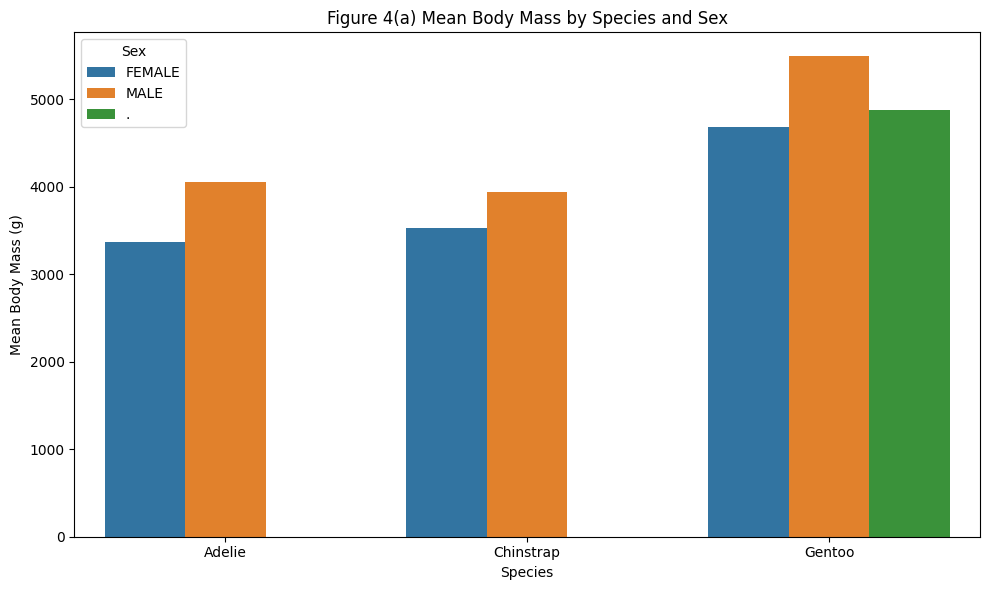

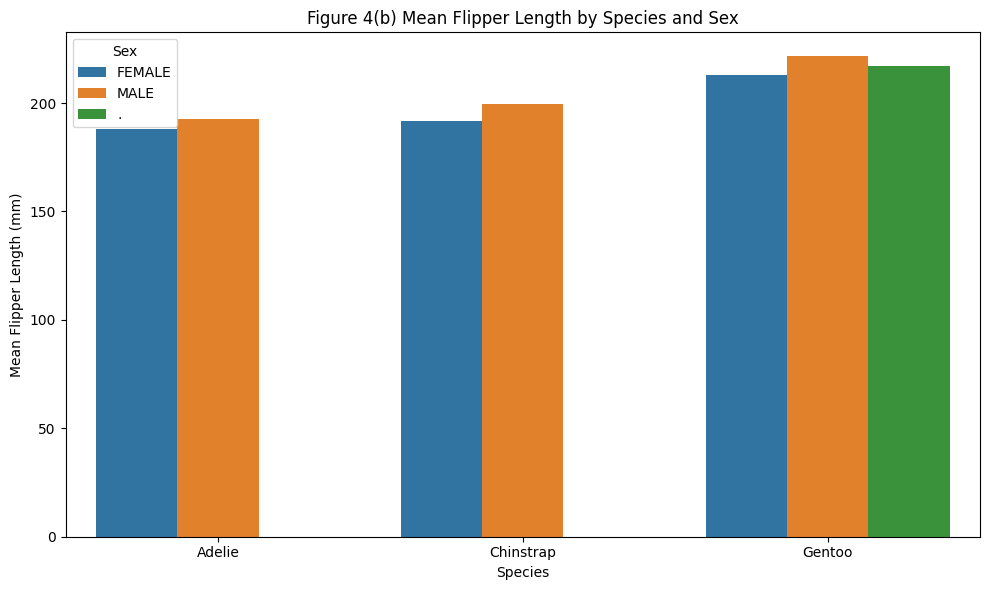

In [ ]:
body_mass_result = body_mass_result.reset_index()
plt.figure(figsize = (10,6))

sns.barplot(data = body_mass_result, x = 'Species', y = 'Body Mass (g)', hue = 'Sex')

plt.xlabel('Species')
plt.ylabel('Mean Body Mass (g)')
plt.title('Figure 4(a) Mean Body Mass by Species and Sex')

plt.tight_layout()
plt.show()

# Bar Chart of Flipper Length
flipper_length_result = flipper_length_result.reset_index()
plt.figure(figsize = (10,6))
sns.barplot(data = flipper_length_result, x = 'Species', y = 'Flipper Length (mm)', hue = 'Sex')

plt.xlabel('Species')
plt.ylabel('Mean Flipper Length (mm)')
plt.title('Figure 4(b) Mean Flipper Length by Species and Sex')

plt.tight_layout()
plt.show()

# Comparing Culmen Depth, Culmen Length, and Sex wrt Penguine type


Considering Figure 5(a), we observe that Gentoo penguins have a smaller average culmen depth compared to other penguin species, and that male penguins generally exhibit greater culmen depths than females across all species. In Figure 5(b), it is evident that Adelie penguins have a smaller average culmen length compared to other species. These observations highlight that both sex and the measurements of culmen depth and culmen length significantly influence the classification of penguin species. By analyzing these two morphological features along with the penguin's sex, we can reasonably predict the species of the penguin, demonstrating their importance in distinguishing between different types of penguins.

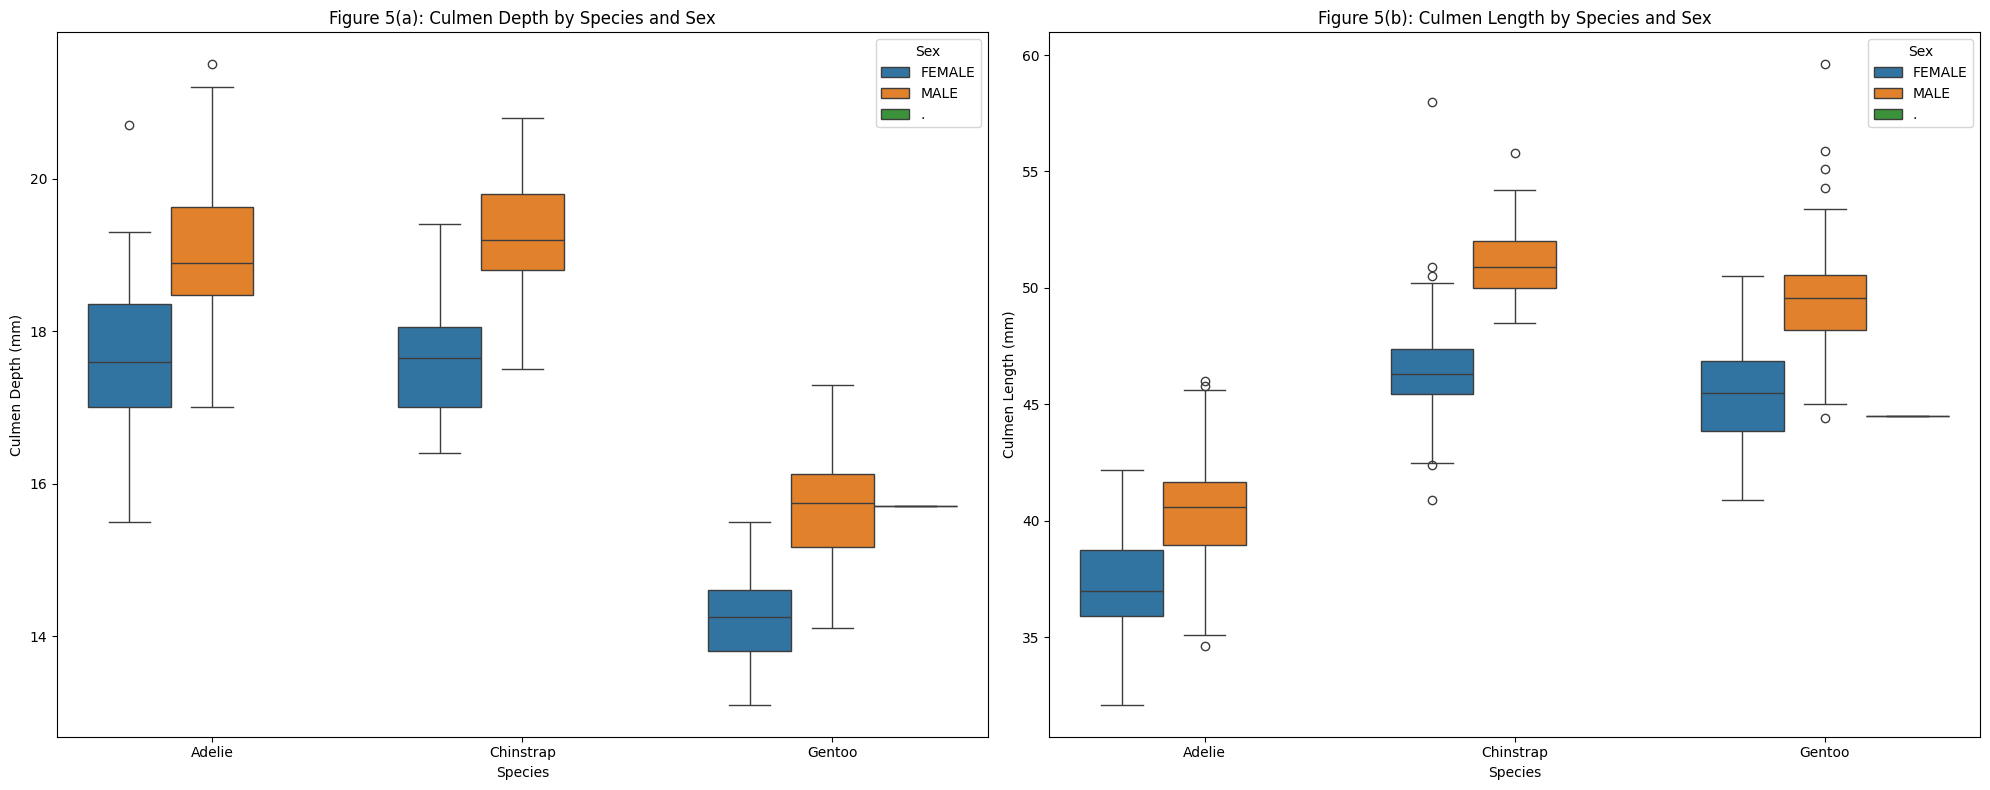

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1
sns.boxplot(x='Species', y='Culmen Depth (mm)', hue='Sex', data=df, ax=axs[0])
axs[0].set_xlabel('Species')
axs[0].set_ylabel('Culmen Depth (mm)')
axs[0].set_title('Figure 5(a): Culmen Depth by Species and Sex')

# Plot 2
sns.boxplot(x='Species', y='Culmen Length (mm)', hue='Sex', data=df, ax=axs[1])
axs[1].set_xlabel('Species')
axs[1].set_ylabel('Culmen Length (mm)')
axs[1].set_title('Figure 5(b): Culmen Length by Species and Sex')

# Adjust layout
plt.tight_layout()
plt.show()

# Comparing Culmen Depth, Culmen Length, and Sex wrt Penguine type

Now, if you consider Figure 6(a) and Figure 6(b), the average culmen length and culment depth of various penguin type is similar regardless the island type. So, we can say that using 'sex' as a qualitative feature while model building should ideal over using 'island' as a qualitative feature.

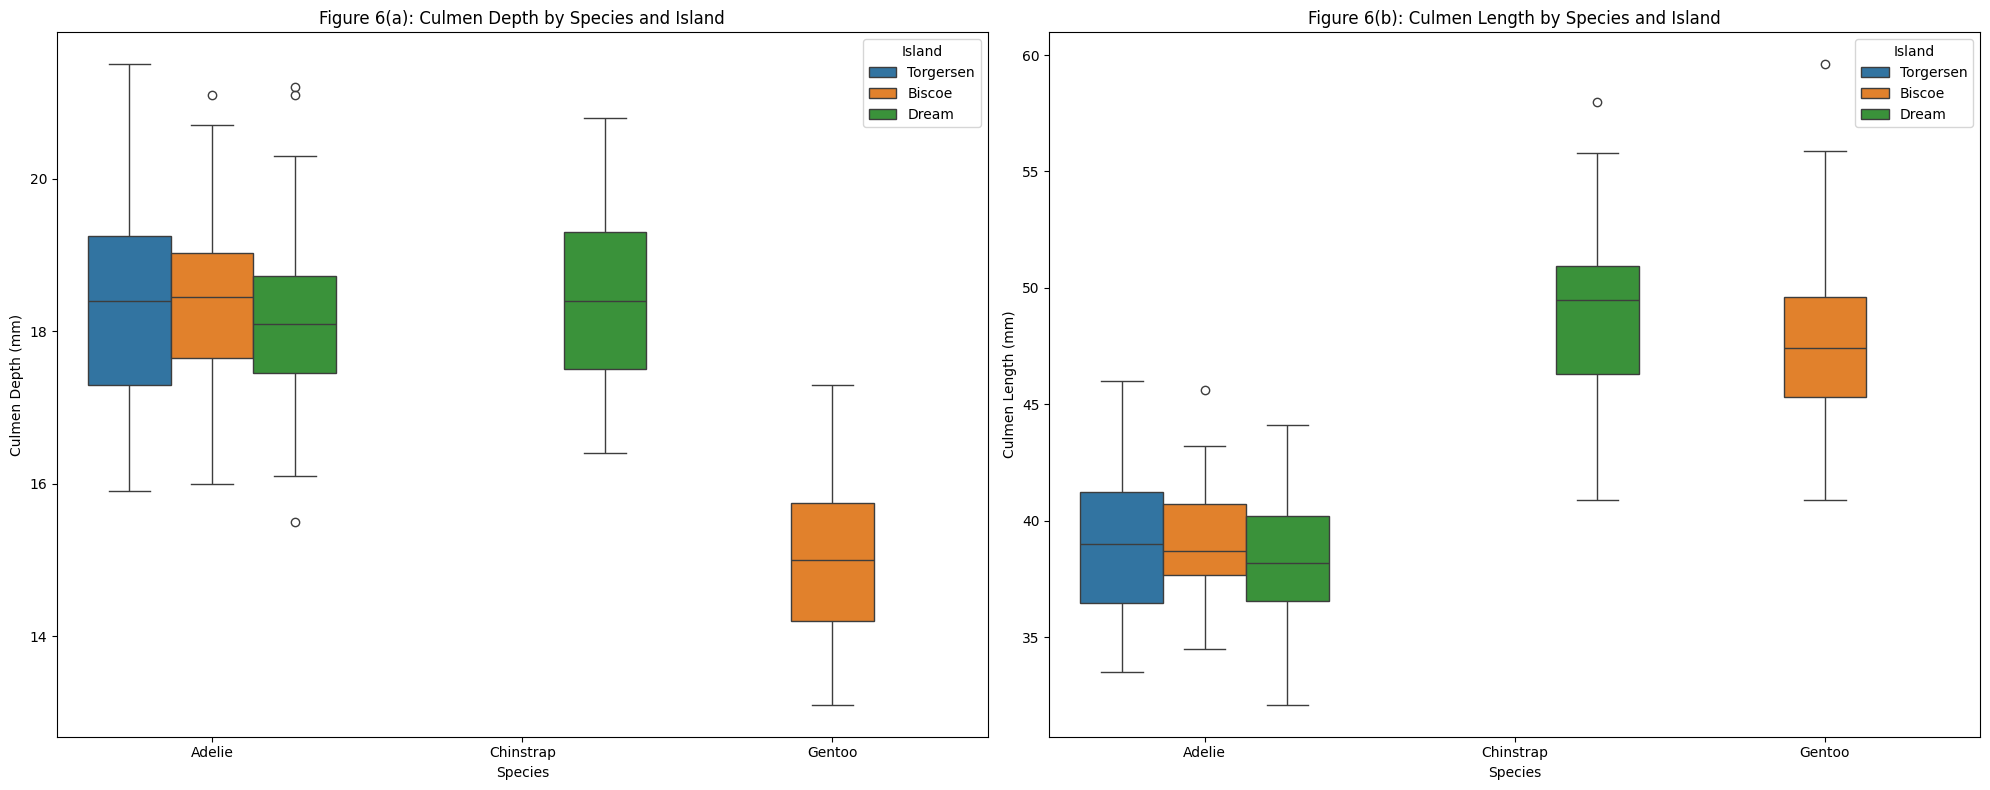

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1
sns.boxplot(x='Species', y='Culmen Depth (mm)', hue='Island', data=df, ax=axs[0])
axs[0].set_xlabel('Species')
axs[0].set_ylabel('Culmen Depth (mm)')
axs[0].set_title('Figure 6(a): Culmen Depth by Species and Island')

# Plot 2
sns.boxplot(x='Species', y='Culmen Length (mm)', hue='Island', data=df, ax=axs[1])
axs[1].set_xlabel('Species')
axs[1].set_ylabel('Culmen Length (mm)')
axs[1].set_title('Figure 6(b): Culmen Length by Species and Island')

# Adjust layout
plt.tight_layout()
plt.show()

# Feature Selection

Considering the Exploratory Data Analysis above we select the following sets of feature to train machine learning model. All of these sets consists of two quantitative feature and one qualitative feature. These sets are as follows. We use these set of features to build three different models

1. Island, Delta 15 N (o/oo) and Delta 15 N (o/oo)
2. Sex, Body Mass (g), Flipper Length (mm)
3. Sex, Culmen Depth (mm), Culmen Length (mm)

# Modeling
# Training SVM with Sex, Body Mass, Flipper Length as feautures to identify Penguin type

In [ ]:
X_train = df_train[['Sex', 'Body Mass (g)', 'Flipper Length (mm)']]
y_train = df_train[['Species']]

X_test = df_test[['Sex', 'Body Mass (g)', 'Flipper Length (mm)']]
y_test = df_test[['Species']]

X_train = label_encoder(X_train, 'Sex')
X_test = label_encoder(X_test, 'Sex')

y_train = label_encoder(y_train, 'Species')
y_test = label_encoder(y_test, 'Species')

<ipython-input-4-39e809df48da>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-4-39e809df48da>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-4-39e809df48da>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')

y_train = y_train.values.ravel()
_ = svc.fit(X_train, y_train)


y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)


accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Train Accuracy: 0.7860262008733624
Test Accuracy: 0.7604166666666666


In [ ]:
def plot_decision_boundary(X, y, model, ax):
    # Define the mesh grid
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    scatter = ax.scatter(X[:, 1], X[:, 2], c=y, edgecolors='k', s=20)
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)

In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[30,  9,  1],
       [11,  5,  2],
       [ 0,  0, 38]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


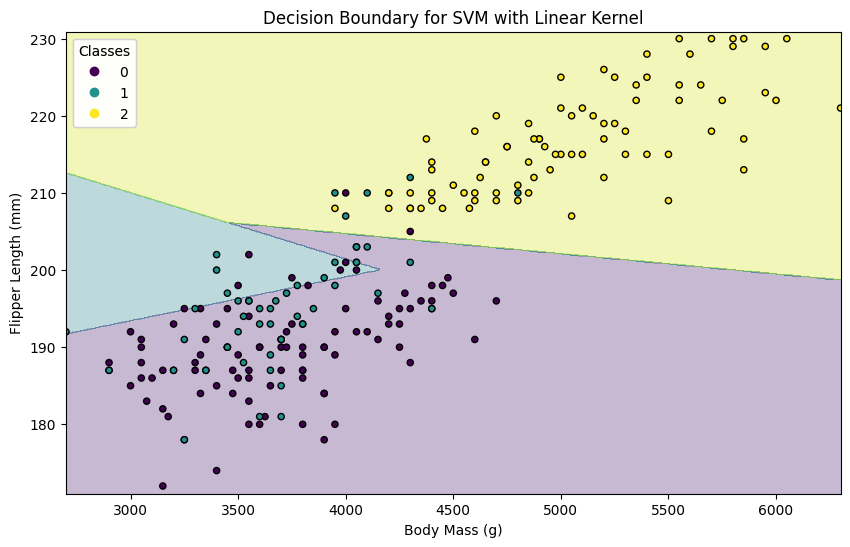

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_decision_boundary(X_train.values, y_train, svc, ax)
ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Flipper Length (mm)')
ax.set_title('Decision Boundary for SVM with Linear Kernel')
plt.show()

Additional Analysis of SVM

The decision region plots below, for male and female penguins show how the SVM model classifies penguins based on body mass and flipper length. The blue region represents the decision boundary for the Adelie penguins, the green region represents the decision boundary for the Chinstrap penguins, and the red region represents the decision boundary for the Gentoo penguins. The overlap of decision boundaries between the Adelie and Chinstrap penguins indicates that the model has a tough time differentiating between the two penguins due to their similarities in body mass and flipper length for both males and females. Since it is hard for the model to distinguish between the Adelie and Chinstrap penguins, this can lead to misclassifications and errors between the two penguin species. Factors such as a similar diet and environment between the Adelie and Chinstrap species are most likely what caused the model to fail in certain cases and mistake the two with each other. The accuracy score of the SVM model was 73.7% which is not particularly high. Some ways we could improve the classification accuracy would be by using additional features to help separate the two features from each other or picking two features that have different variables affecting them so they wouldn’t have such a strong correlation between each other.


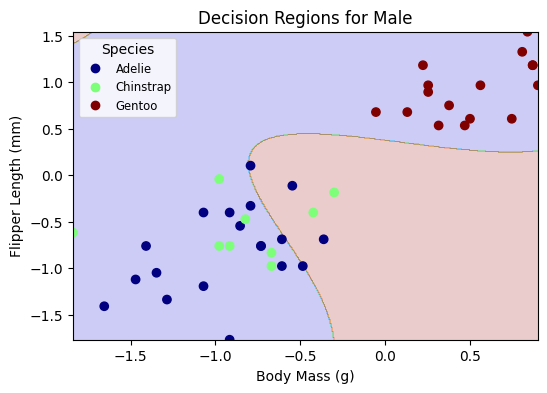

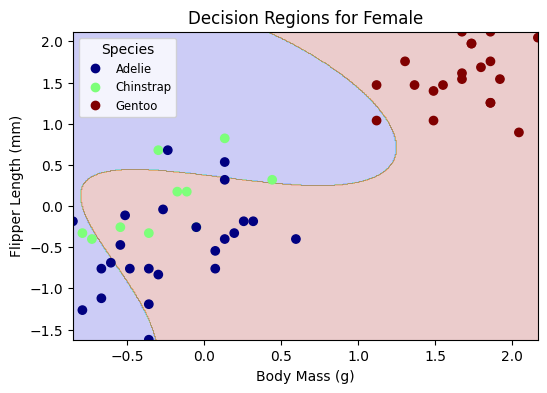

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm

penguins = df[(df['Sex'] != '.') & (~df['Body Mass (g)'].isnull())]

X = penguins[['Body Mass (g)', 'Flipper Length (mm)']]
y = penguins['Sex']

# Encoding qualitative feature 'Sex' as target variable and 'Species'
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
species_le = preprocessing.LabelEncoder()
species = species_le.fit_transform(penguins['Species'])

# Splitting data into test and training sets
X_train, X_test, y_train, y_test, species_train, species_test = train_test_split(X, y, species, test_size=0.3, random_state=42)

#Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

SVM = svm.SVC()
SVM.fit(X_train, y_train)
SVM_predictions = SVM.predict(X_test)


def plot_regions(c, X, y, species, sex_label):
    """
   Plots the classification model for the penguins dataset and highlights the regions classified for each class.

   Parameters:
   c: The classification model
   X: The two quantitative features Body Mass (g) and Flipper Length (mm)
   y: The target variable Sex corresponding to the features in X
   species: The encoded species label for the points in X
   sex_label: The label for the sex category being visualized (Male and Female)

   Returns:
   None

    """

    x0 = X[:, 0]
    x1 = X[:, 1]

    # Create a grid
    grid_x = np.linspace(x0.min(), x0.max(), 501)
    grid_y = np.linspace(x1.min(), x1.max(), 501)
    xx, yy = np.meshgrid(grid_x, grid_y)

    # Extract model predictions
    XX = xx.ravel()
    YY = yy.ravel()
    XY = np.c_[XX, YY]

    p = c.predict(XY)
    p = p.reshape(xx.shape)

    # Create the plot
    fig, ax = plt.subplots(1, figsize=(6,4))

    # Use contour plot to visualize the predictions
    ax.contourf(xx, yy, p, cmap="jet", alpha=0.2, vmin=0, vmax=1)

    # Plot the data
    scatter = ax.scatter(x0, x1, c=species, cmap="jet", vmin=0, vmax=2)

    # Create a legend
    handles, labels = scatter.legend_elements()
    legend_labels = species_le.inverse_transform([0, 1, 2])
    legend = ax.legend(handles, legend_labels, title="Species", fontsize = "small")

    ax.set(xlabel="Body Mass (g)", ylabel="Flipper Length (mm)")
    plt.title(f'Decision Regions for {sex_label}')
    plt.show()


# Plot Decision Regions for Male and Female
plot_regions(SVM, X_test[y_test == 0], y_test[y_test == 0], species_test[y_test == 0], 'Male')
plot_regions(SVM, X_test[y_test == 1], y_test[y_test == 1], species_test[y_test == 1], 'Female')

# Training kNN with Island, Delta 15 N (o/oo), Delta 15 C (o/oo) as feautures to identify Penguin type

Considering the accuracy of 76% of the previous SVM model, it is better to improve this by considering the different set of features and different model. We use Island, Delta 15 N (o/oo), Delta 15 C (o/oo) as features to train the kNN model with 3 clusters.

In [ ]:
X_train = df_train[['Island', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']]
y_train = df_train[['Species']]

X_test = df_test[['Island', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']]
y_test = df_test[['Species']]

X_train = label_encoder(X_train, 'Island')
X_test = label_encoder(X_test, 'Island')

y_train = label_encoder(y_train, 'Species')
y_test = label_encoder(y_test, 'Species')

<ipython-input-4-39e809df48da>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-4-39e809df48da>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-4-39e809df48da>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)

y_train = y_train.values.ravel()
_ = knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)


accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Train Accuracy: 0.9388646288209607
Test Accuracy: 0.9479166666666666


In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[37,  1,  2],
       [ 0, 18,  0],
       [ 2,  0, 36]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


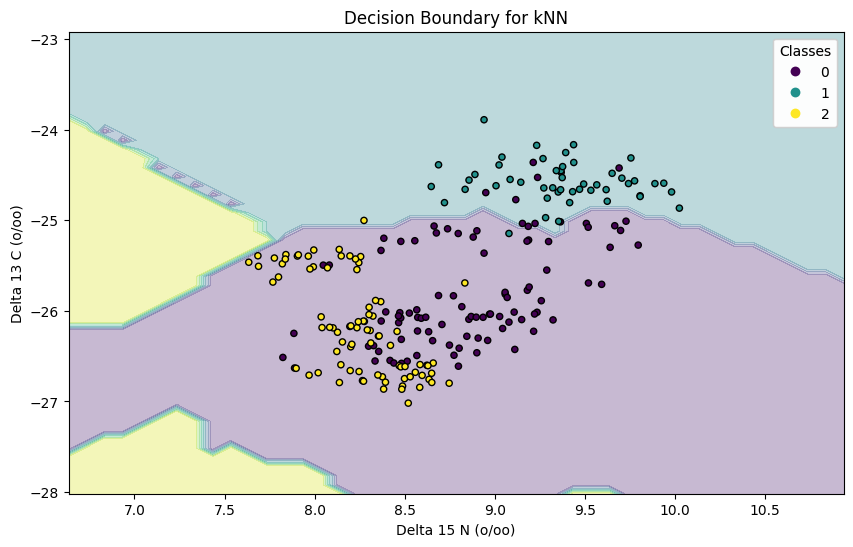

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_decision_boundary(X_train.values, y_train.values.ravel(), knn, ax)
ax.set_xlabel('Delta 15 N (o/oo)')
ax.set_ylabel('Delta 13 C (o/oo)')
ax.set_title('Decision Boundary for kNN')
plt.show()

kNN model Discussion.

There is not much difference between test accuracy and train accuracy. We are getting test accuracy as around 94.79% which is almost 95%. We can say that the model is performing well.

# Training Random Forest with Sex, Culmen Length, Culmen depth as feautures to identify Penguin type

The decision boundry for kNN is confusing. To improve that we train Random Forest with the consisting of features such as Sex, Culmen Length, Culmen Depth to identify the penguin type.

In [ ]:
X_train = df_train[['Sex', 'Culmen Depth (mm)', 'Culmen Length (mm)']]
y_train = df_train[['Species']]

X_test = df_test[['Sex', 'Culmen Depth (mm)', 'Culmen Length (mm)']]
y_test = df_test[['Species']]

X_train = label_encoder(X_train, 'Sex')
X_test = label_encoder(X_test, 'Sex')

y_train = label_encoder(y_train, 'Species')
y_test = label_encoder(y_test, 'Species')

<ipython-input-4-39e809df48da>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-4-39e809df48da>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-4-39e809df48da>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

y_train = y_train.values.ravel()
_ = rf.fit(X_train, y_train)


y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)


accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Train Accuracy: 1.0
Test Accuracy: 0.9270833333333334


In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[36,  4,  0],
       [ 0, 17,  1],
       [ 0,  2, 36]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


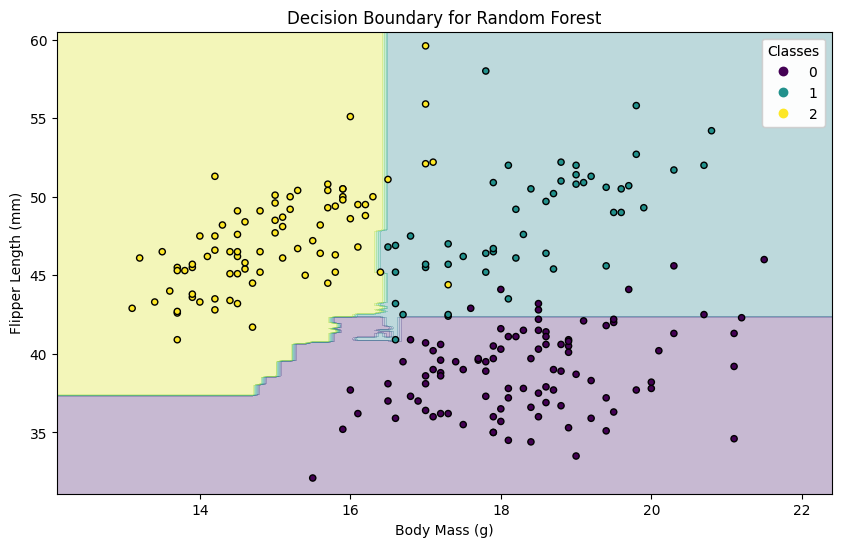

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_decision_boundary(X_train.values, y_train, rf, ax)
ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Flipper Length (mm)')
ax.set_title('Decision Boundary for Random Forest')
plt.show()

# Model Discussion

SVM: The support vector machine classifier with linear kernel is giving 76% test accuracy. this implies that the SVC classifier is a poor choice for this model.

kNN: The kNN model is giving us three clusters the test accuaracy is good (around 95%). This implies that kNN model is better than SVM

Random Forest: The random forest model is giving around 93% accuracy on the test dataset.

Considering this we could say that the Random Forest Model and kNN model are better for identifying the type of penguin species. It also, depends on the features that we are using to determine the type of penguin.

Sex, Culmen Length, Culmen Depth is a set that gives higher accuracy with Random Forest model based the analysis.

Also, Island, Delta 15 N (o/oo), Delta 13 C (o/oo) is another set that reveals very important and non redundant information about penguins to
